# Multiple Randomization Designs: Paper Plot Reproduction

This notebook reproduces all figures from the paper:  
**"Multiple Randomization Designs: Estimation and Inference with Interference"**

## Contents:
- **Main Paper Figures:** Figures 1 and 2 from the main text
- **Appendix Figures:** Complete appendix figures 1-8
- **Additional Experiments:** Creator-Advertiser and CES marketplace experiments
- **Null Hypothesis Testing:** Corrected p-value calculations for pairwise comparisons

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spst
from itertools import combinations
import seaborn as sns

# Import from clean utils modules
from utils.data_generation import *
from utils.inference import *
from utils.plotting import *

# Configure matplotlib and seaborn styling
plt.rcParams.update({
    "font.family": "Computer Modern Roman"
})
sns.set_theme()

# Create plots directory if it doesn't exist
os.makedirs('plots', exist_ok=True)

print("✅ All imports loaded successfully!")


✅ All imports loaded successfully!


# Main Experiment

This section reproduces the core experiment from the paper using the exact same parameters and methodology.

**Experiment Setup:**
- **Distribution:** Normal 
- **Parameters:** Different means and variances for each treatment type
- **Sample Size:** 200 movies × 150 viewers
- **Active Units:** 90 movies × 85 viewers  
- **Monte Carlo Runs:** 10,000 experiments


In [2]:
# Exact parameters from JASA notebook
rv_type = 'normal'  # declare distribution kernel F
params = 3, 1, -1, 1, -1, 1, 6, 1  # mu_s, sigma_s for s in {c, im, iv, t}
total = [200, 150]  # total number of movies, viewers
active = [90, 85]   # movies in I_1, viewers in J_1
num_treatments = 10000  # number of experiments to be run in the Monte Carlo simulation
seed = 42  # for pseudorandomness

print("=" * 60)
print("Main JASA Experiment Parameters")
print("=" * 60)
print(f'Distribution type: {rv_type}')
print(f'Parameters:')
print(f'\t mu_c, sigma_c = {params[:2]}')
print(f'\t mu_im, sigma_im = {params[2:4]}')
print(f'\t mu_iv, sigma_iv = {params[4:6]}')
print(f'\t mu_t, sigma_t = {params[6:]}')
print(f'Sample size:')
print(f'\t I, J = {total}')
print(f'\t I_1, J_1 = {active}')
print(f'# treatments: {num_treatments}')

print("\nGenerating synthetic data...")
# Instantiate class for data generation
synthetic_data = Synthethic_Data_ALI(rv_type, params, total, seed)

# Draw data
potential_outcomes = synthetic_data.draw_potential_outcomes()

print("Running experiment...")
# Instantiate class for experiment
experiment = Simple_Double_Randomized_Experiment(potential_outcomes, active, num_treatments, seed)

# Compute results
results = experiment.run_experiment()

print("✅ Main experiment completed successfully!")
print(f"Results keys: {list(results.keys())}")

Main JASA Experiment Parameters
Distribution type: normal
Parameters:
	 mu_c, sigma_c = (3, 1)
	 mu_im, sigma_im = (-1, 1)
	 mu_iv, sigma_iv = (-1, 1)
	 mu_t, sigma_t = (6, 1)
Sample size:
	 I, J = [200, 150]
	 I_1, J_1 = [90, 85]
# treatments: 10000

Generating synthetic data...
Data drawn; elapsed time: 0.0021 seconds
Running experiment...
Drawing random assignments...


100%|██████████| 10000/10000 [00:00<00:00, 10547.39it/s]


Instantiating array of observed data across experiments...
Computing average effects...


100%|██████████| 10000/10000 [00:04<00:00, 2015.41it/s]


Computing estimates of variance from the sample...


100%|██████████| 10000/10000 [00:04<00:00, 2332.76it/s]

Experiment completed; Total computing time :  24.524  seconds
✅ Main experiment completed successfully!
Results keys: ['potential_outcomes', 'types', 'realized_outcomes', 'total', 'active', 'population_average_effects', 'population_spillover_effects', 'sample_average_effects', 'sample_spillover_effects', 'population_variance_average_effects', 'population_covariance_average_effects', 'population_variance_spillover_effects', 'sample_variance_average_effects', 'sample_variance_spillover_effects']



GENERATING MAIN PAPER FIGURES
📊 Figure 1: Average effects and variance (main_cc)
plots/main_cc


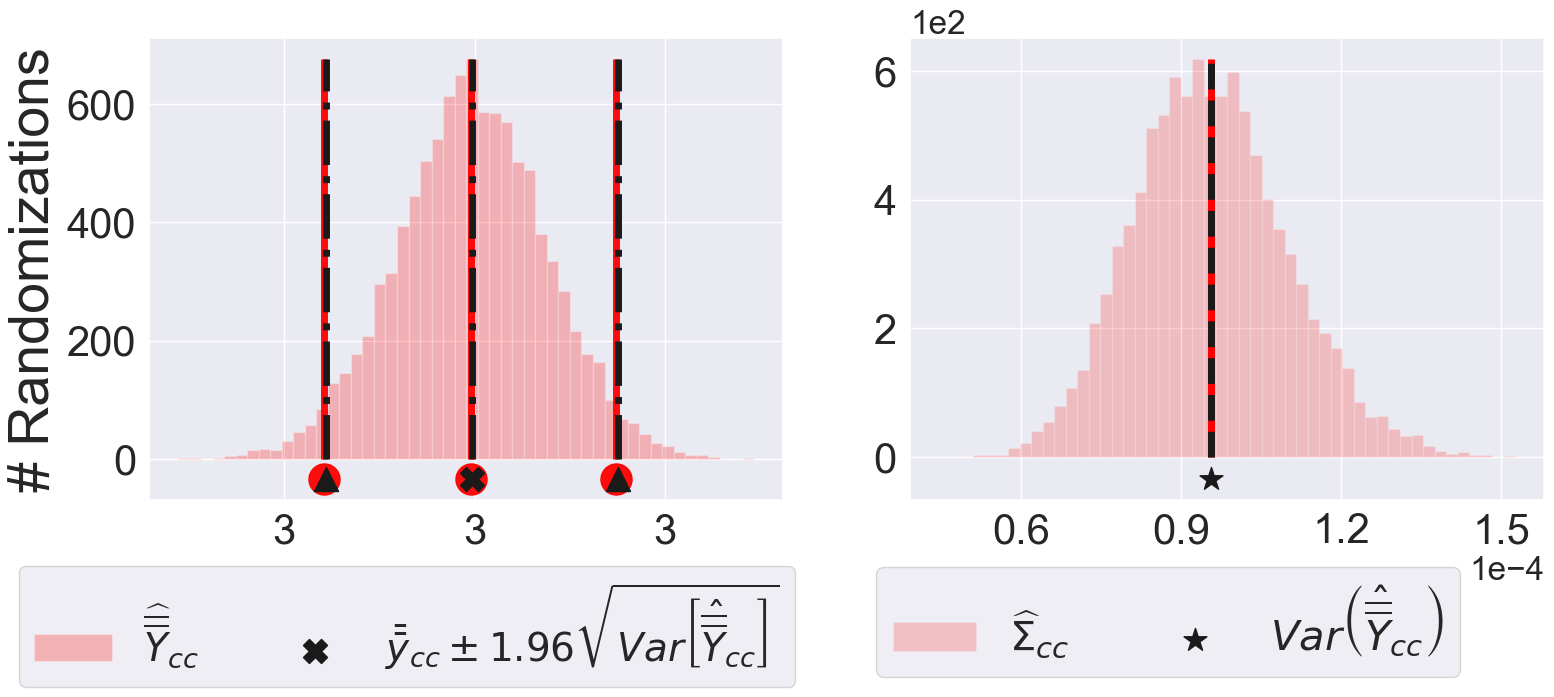

📊 Figure 2: Mean and variance of spillovers (main_spill)


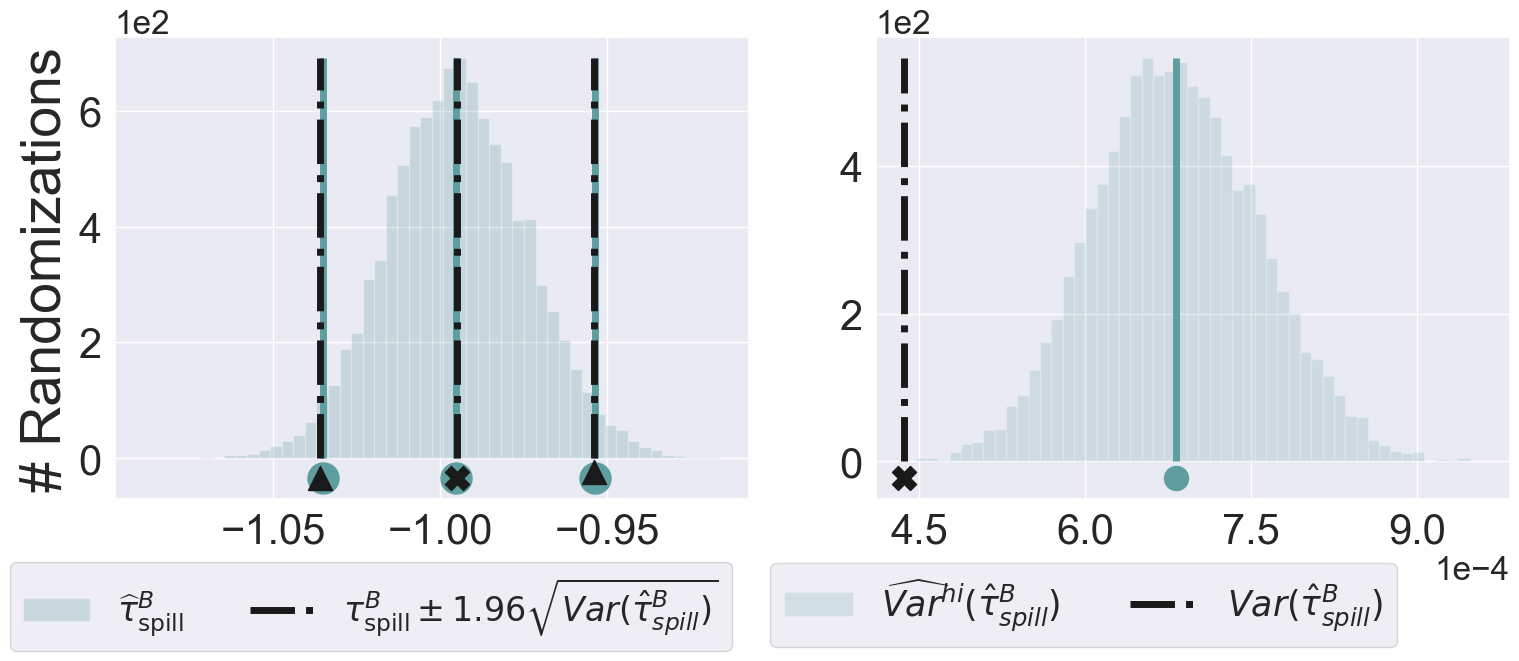

✅ Main paper figures generated!


In [3]:
print("\n" + "=" * 60)
print("GENERATING MAIN PAPER FIGURES")
print("=" * 60)

print("📊 Figure 1: Average effects and variance (main_cc)")
plot_avg_and_variance_average_effects(results, 'plots/main_cc')

print("📊 Figure 2: Mean and variance of spillovers (main_spill)")  
plot_mean_var_spillovers(results, 'plots/main_spill')

print("✅ Main paper figures generated!")


GENERATING APPENDIX FIGURES
📊 Appendix Figure 1: CC type average effects
plots/cc


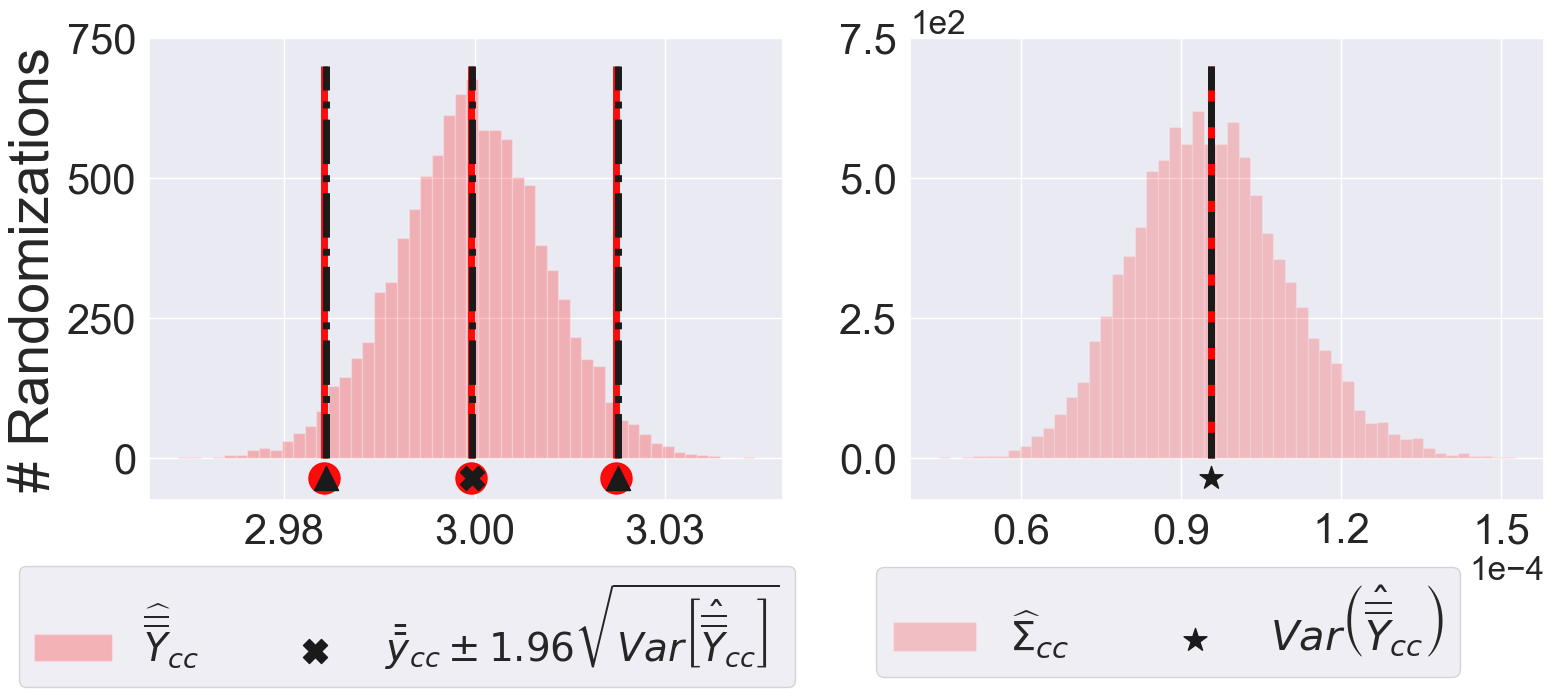

📊 Appendix Figure 2: IB type average effects
plots/ib


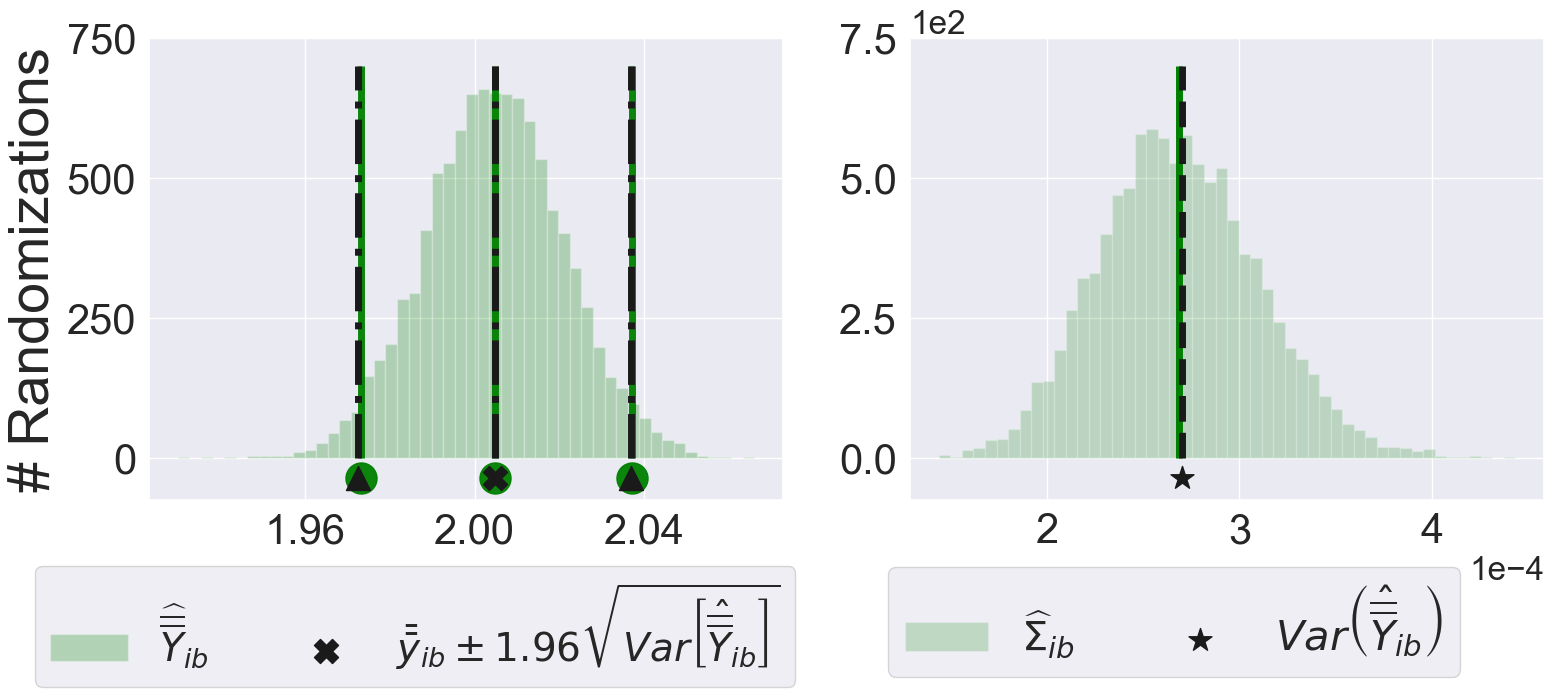

📊 Appendix Figure 3: IS type average effects
plots/is


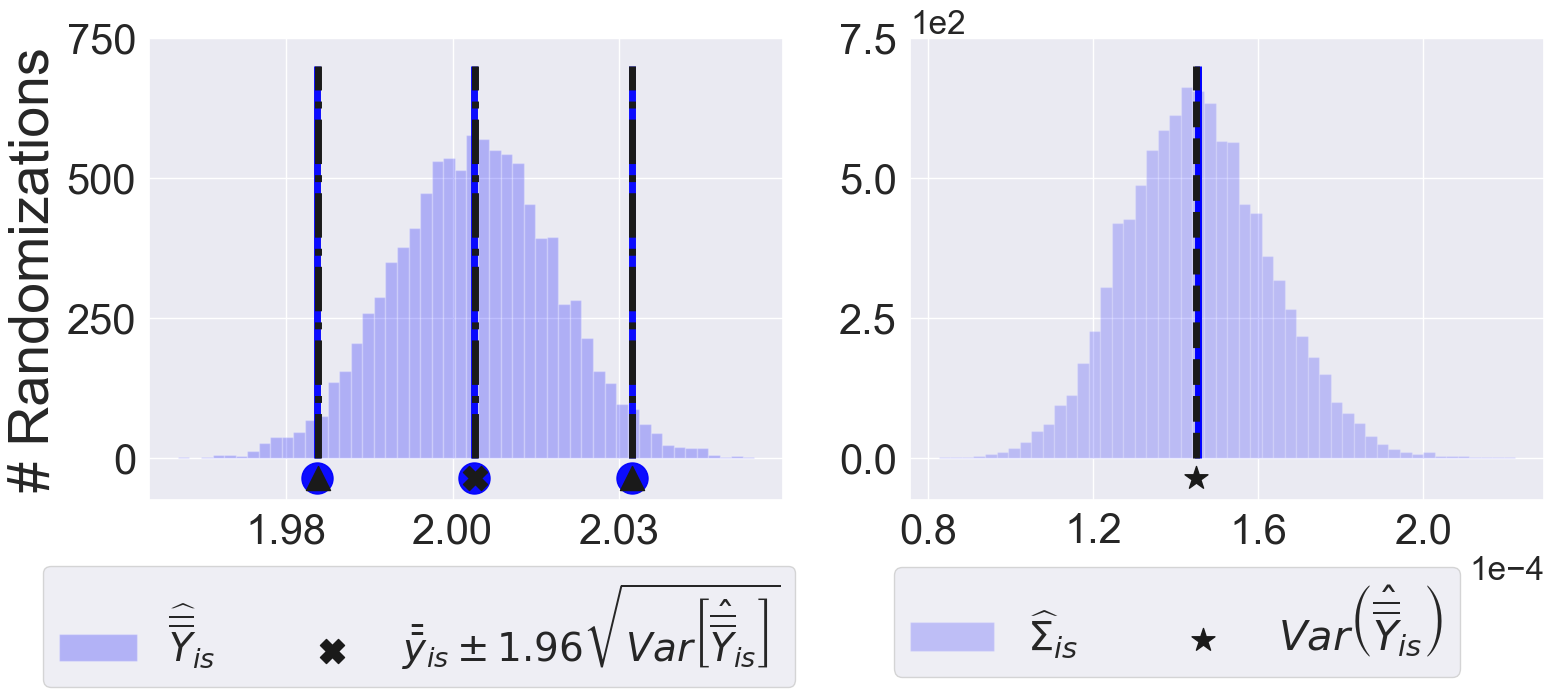

📊 Appendix Figure 4: TR type average effects
plots/tr


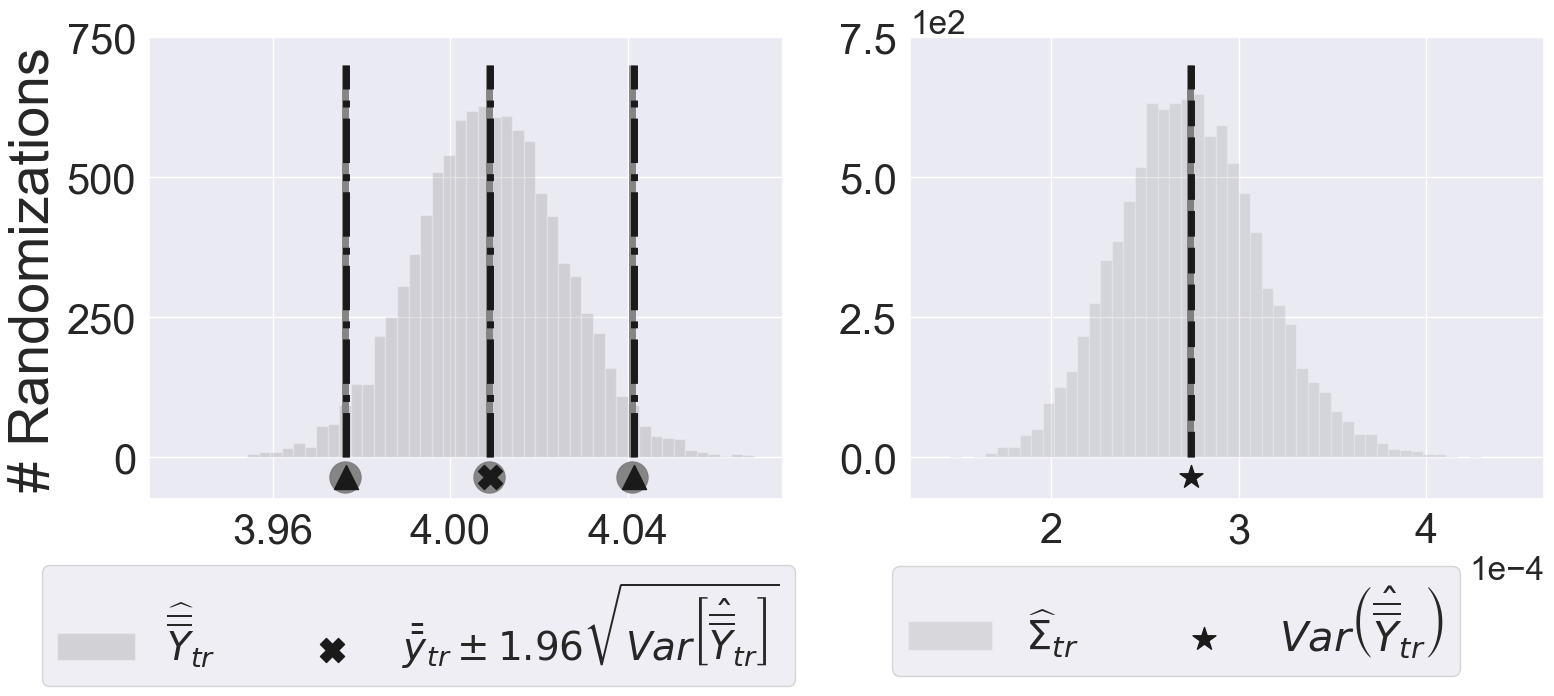

📊 Appendix Figure 5: Direct spillover


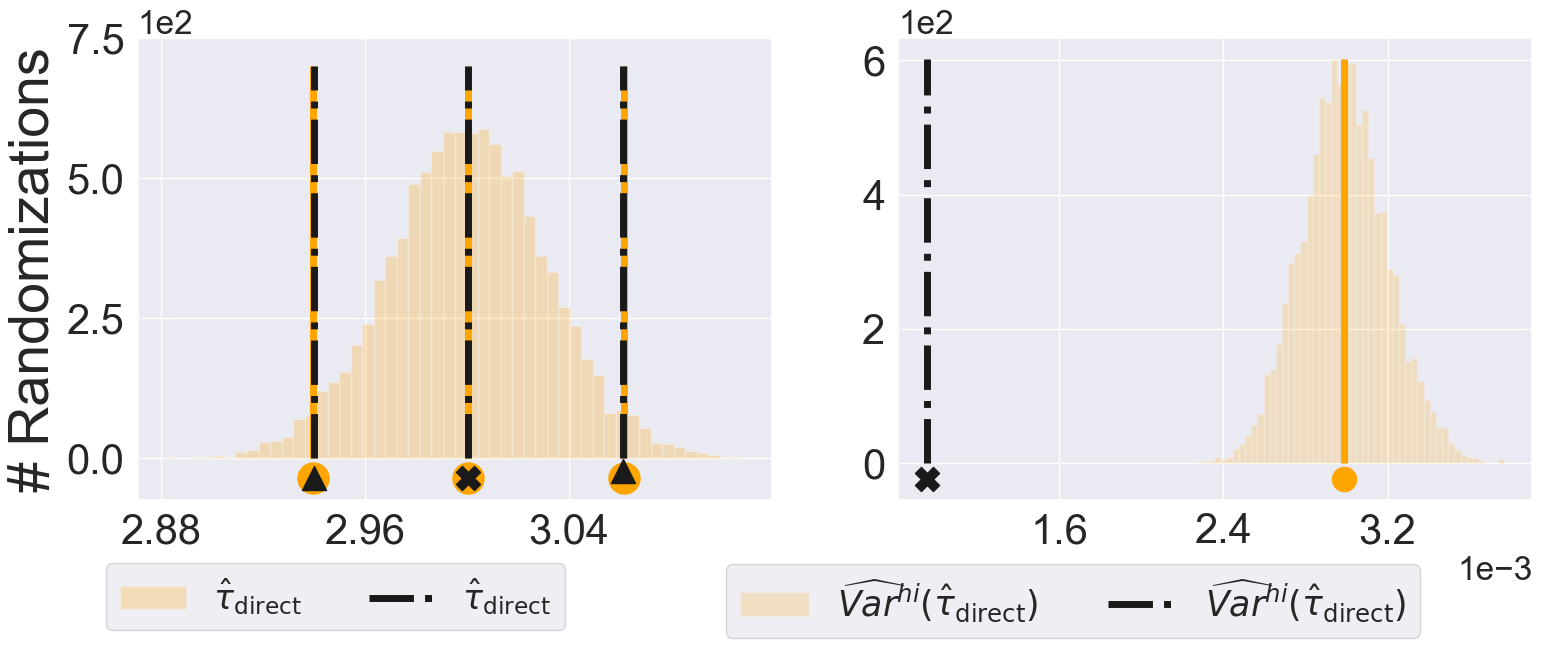

📊 Appendix Figure 6: Buyer spillover


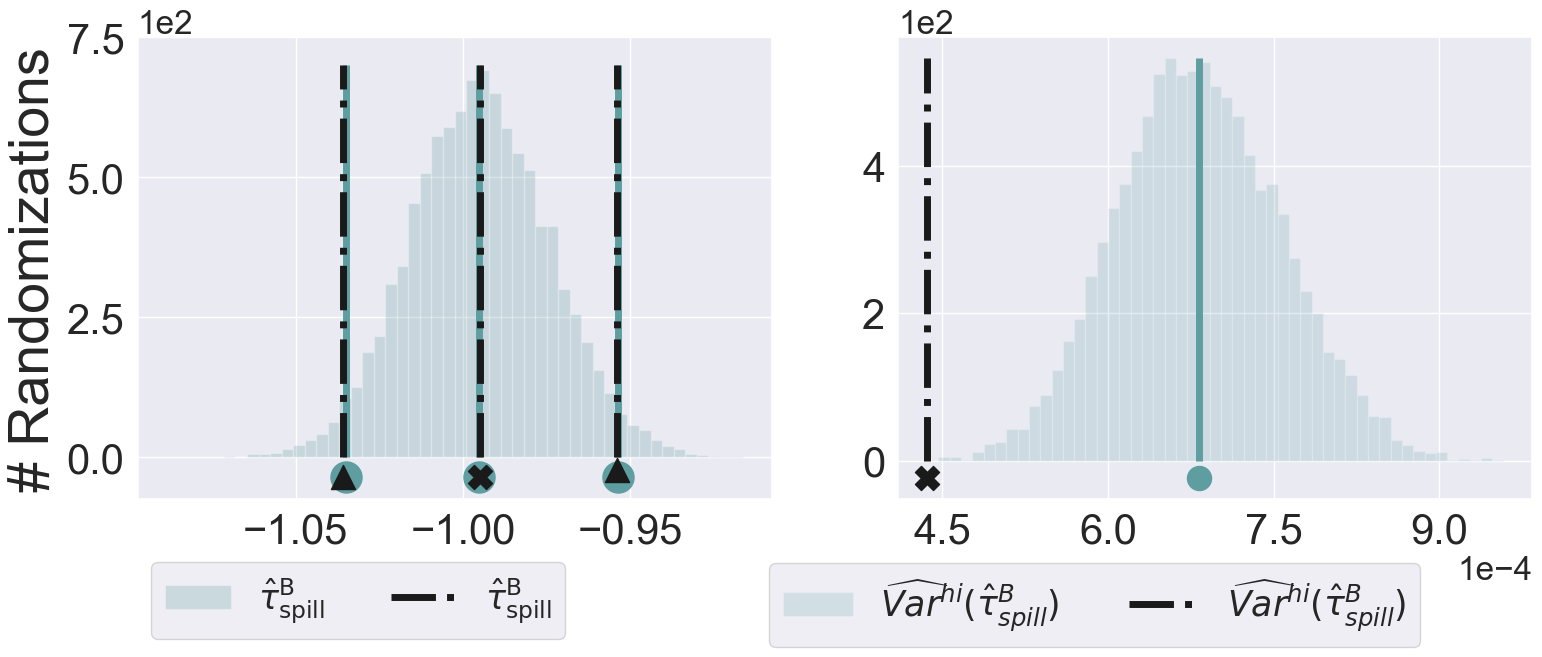

📊 Appendix Figure 7: Seller spillover


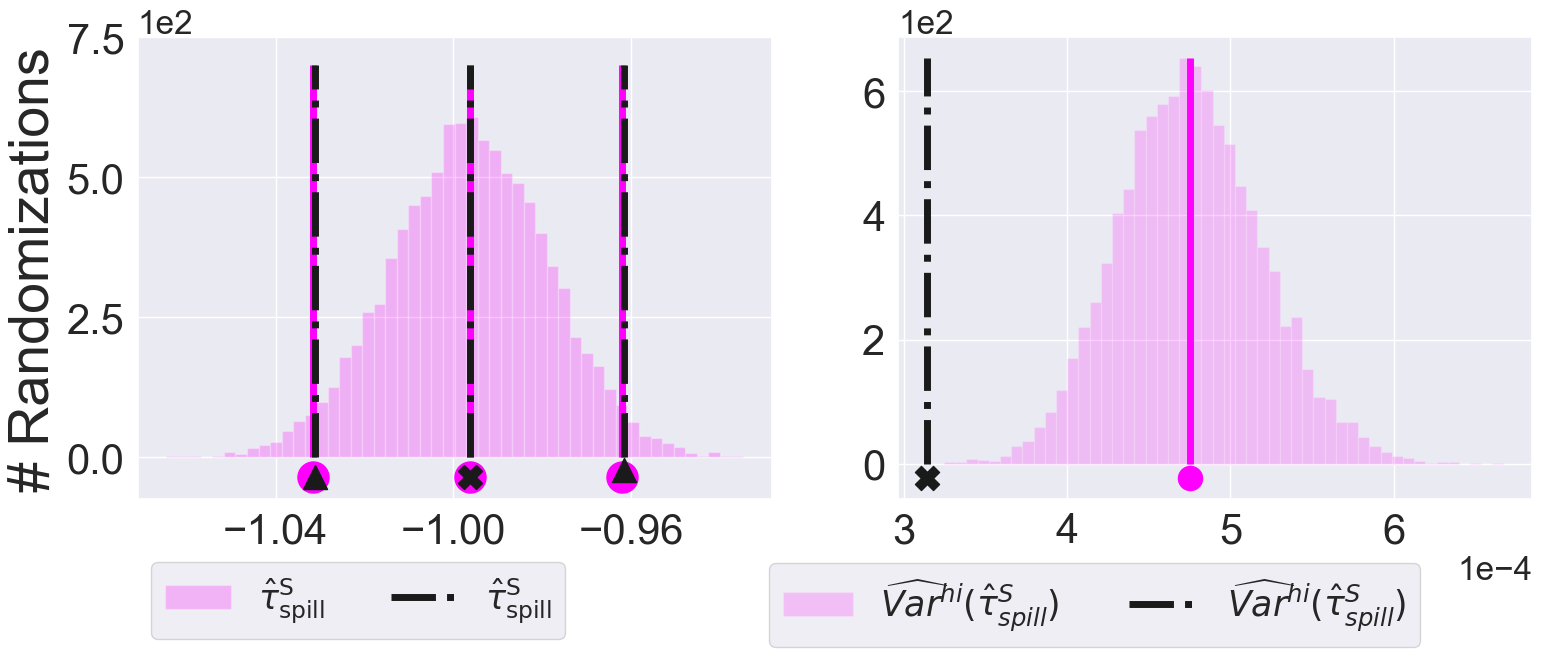

📊 Appendix Figure 8: Pairs spillover


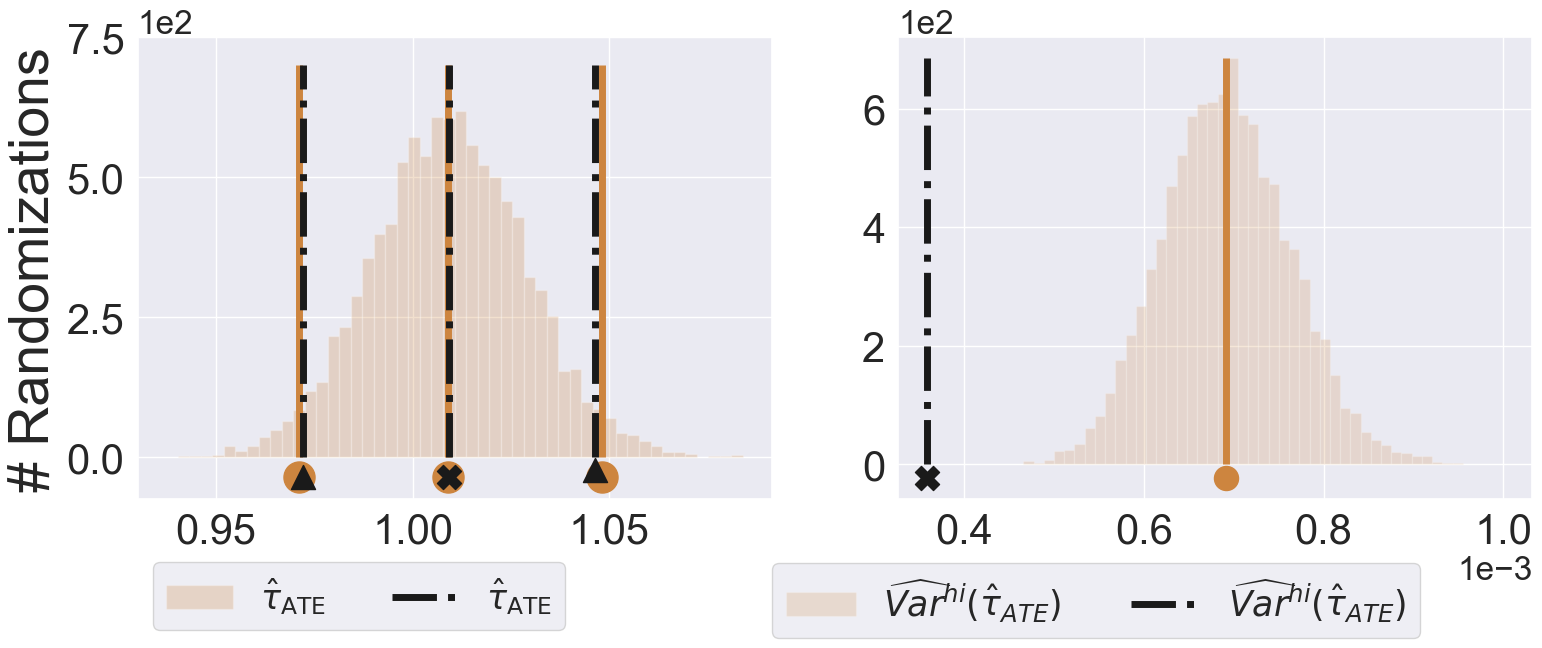

✅ All appendix figures generated!


In [4]:
print("\n" + "=" * 60)
print("GENERATING APPENDIX FIGURES")
print("=" * 60)

print("📊 Appendix Figure 1: CC type average effects")
appendix_plot_avg_and_variance_average_effects(results, 0, 'plots/cc')

print("📊 Appendix Figure 2: IB type average effects")
appendix_plot_avg_and_variance_average_effects(results, 1, 'plots/ib')

print("📊 Appendix Figure 3: IS type average effects")
appendix_plot_avg_and_variance_average_effects(results, 2, 'plots/is')

print("📊 Appendix Figure 4: TR type average effects")
appendix_plot_avg_and_variance_average_effects(results, 3, 'plots/tr')

print("📊 Appendix Figure 5: Direct spillover")
appendix_plot_mean_var_spillovers(results, 0, 'plots/spill_direct')

print("📊 Appendix Figure 6: Buyer spillover")
appendix_plot_mean_var_spillovers(results, 1, 'plots/spill_buyer')

print("📊 Appendix Figure 7: Seller spillover")
appendix_plot_mean_var_spillovers(results, 2, 'plots/spill_seller')

print("📊 Appendix Figure 8: Pairs spillover")
appendix_plot_mean_var_spillovers(results, 3, 'plots/spill_pairs')

print("✅ All appendix figures generated!")


# Additional Experiments

This section includes additional marketplace experiments that demonstrate the MRD methodology on different data generating processes.

## Experiments:
1. **Creator-Advertiser Marketplace:** Two-sided market with complementarity between actions
2. **CES Marketplace:** Constant Elasticity of Substitution marketplace with flat rate discount



Running Creator-Advertiser Marketplace with Complementarity
Market parameters:
	 N_PRODUCTS: 150
	 N_CUSTOMERS: 200
	 ACTIVE_PRODUCTS: 80
	 ACTIVE_CUSTOMERS: 90
	 NUM_TREATMENTS: 2000
Drawing random assignments...


100%|██████████| 2000/2000 [00:00<00:00, 10771.56it/s]

Instantiating array of observed data across experiments...


Computing average effects...


100%|██████████| 2000/2000 [00:00<00:00, 2170.74it/s]


Computing estimates of variance from the sample...


100%|██████████| 2000/2000 [00:00<00:00, 2223.65it/s]


Experiment completed; Total computing time :  3.5950  seconds
📊 Creator-Advertiser: Average effects and variance
plots/creator_advertiser_cc


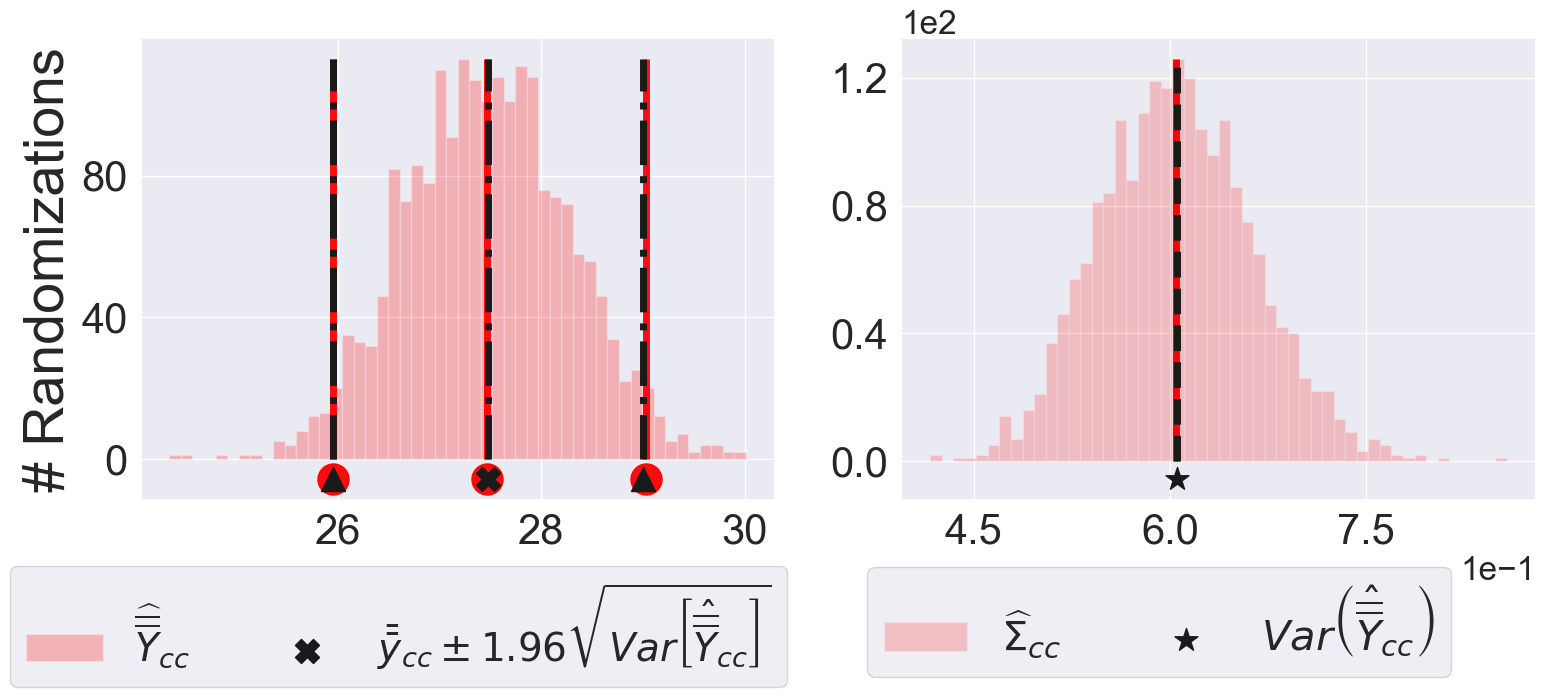

📊 Creator-Advertiser: Spillover effects


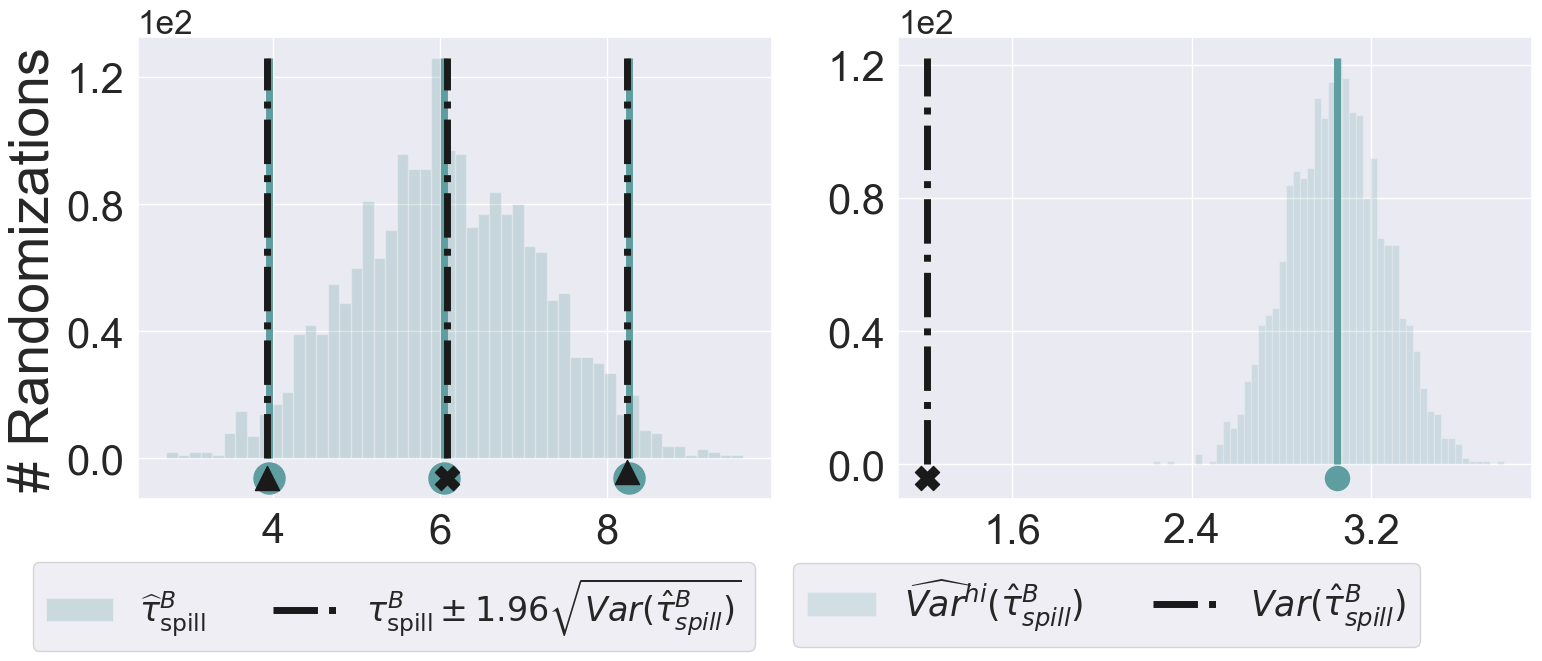

📊 Creator-Advertiser: T-statistics
Population value: 6.08359602610302 , Power: 0.995
plots/creator_advertiser_tstat


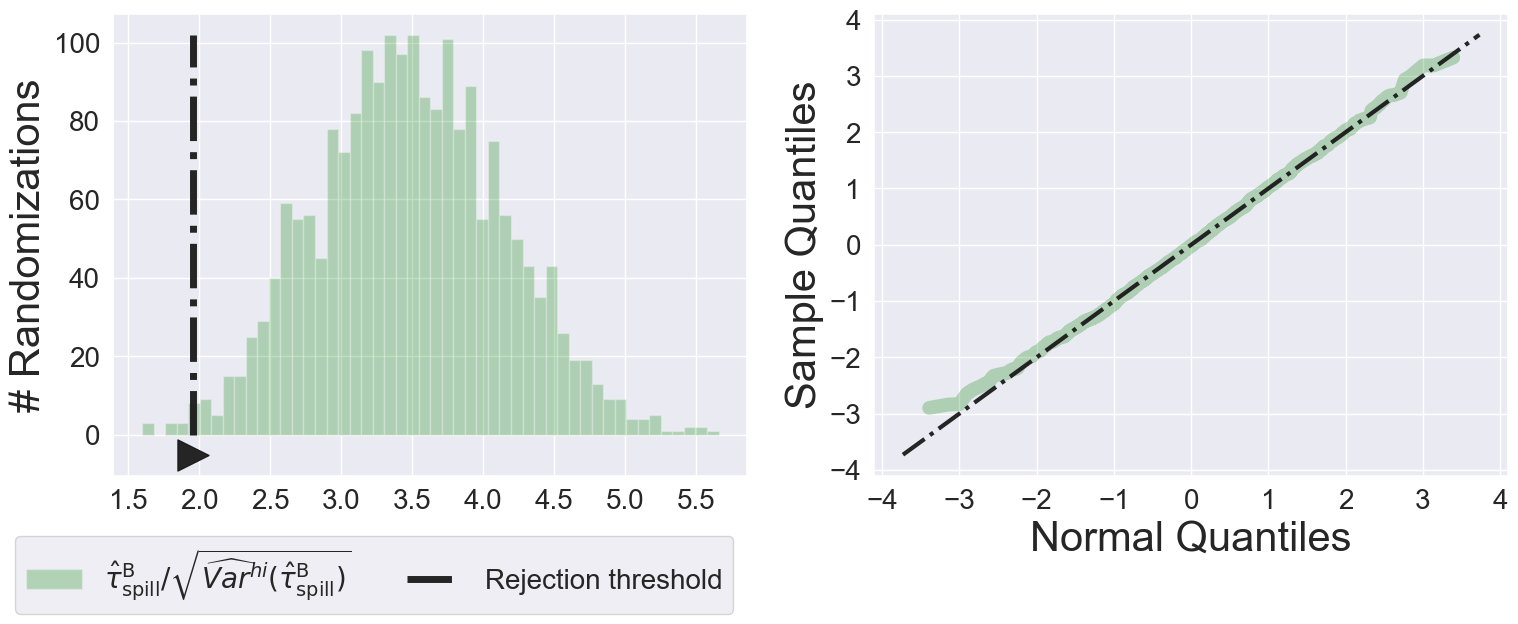

✅ Creator-Advertiser Marketplace completed successfully!


In [5]:
print("\n" + "=" * 60)
print("Running Creator-Advertiser Marketplace with Complementarity")
print("=" * 60)

# Parameters from notebook
N_PRODUCTS = 150
N_CUSTOMERS = 200
ACTIVE_PRODUCTS = 80
ACTIVE_CUSTOMERS = int(.45 * N_CUSTOMERS)
NUM_TREATMENTS = 2000

print(f'Market parameters:')
print(f'\t N_PRODUCTS: {N_PRODUCTS}')
print(f'\t N_CUSTOMERS: {N_CUSTOMERS}')
print(f'\t ACTIVE_PRODUCTS: {ACTIVE_PRODUCTS}')
print(f'\t ACTIVE_CUSTOMERS: {ACTIVE_CUSTOMERS}')
print(f'\t NUM_TREATMENTS: {NUM_TREATMENTS}')

# Create market
market = CreatorAdvertiserMarketplaceWithCompilmentarity(
    n_customers=N_CUSTOMERS, 
    n_products=N_PRODUCTS, 
    seed=12, 
    direct_lift=.05, 
    avg_mu=1,
    outcome='profit',
    bmax_customer=.2,
    bmax_product=.2
)

# Get potential outcomes and run experiment
potential_outcomes = market.get_potential_outcomes(
    active_customers=ACTIVE_CUSTOMERS,
    active_products=ACTIVE_PRODUCTS
)

sdrd = SimpleDoubleRandomizedExperimentWithLocalInterference(
    potential_outcomes=potential_outcomes.transpose([1,2,0]), 
    active=np.array([ACTIVE_CUSTOMERS, ACTIVE_PRODUCTS]),
    num_treatments=NUM_TREATMENTS,
    seed=12
)

creator_results = sdrd.run_experiment()

print("📊 Creator-Advertiser: Average effects and variance")
plot_avg_and_variance_average_effects(creator_results, 'plots/creator_advertiser_cc')

print("📊 Creator-Advertiser: Spillover effects")
plot_mean_var_spillovers(creator_results, 'plots/creator_advertiser_spill')

print("📊 Creator-Advertiser: T-statistics")
plot_t_stat_qq_spillover(creator_results, 'plots/creator_advertiser_tstat', 1)

print("✅ Creator-Advertiser Marketplace completed successfully!")


# Null Hypothesis Testing with Corrected P-Values

This section tests the null hypothesis that all treatment types have identical effects by:

1. **Creating true null data** where all treatment means are identical (μ = 0 for all types)
2. **Computing pairwise differences** for all 6 combinations: (cc,ib), (cc,is), (cc,tr), (ib,is), (ib,tr), (is,tr) 
3. **Using proper covariance matrix** for accurate p-value calculation
4. **Generating diagnostic plots** to verify uniform p-value distribution under null

**Key Innovation:** Uses population covariance matrix to compute correct standard errors for pairwise differences, addressing the p-value inflation issue.

In [6]:
print("\n" + "=" * 60)
print("RUNNING NULL HYPOTHESIS TESTING (CORRECTED P-VALUES)")
print("=" * 60)

# Null hypothesis parameters - all means = 0, small equal variances
rv_type = 'normal'
null_params = 0, 1, 0, .05, 0, .05, 0, .05  # mu_s, sigma_s for s in {c, im, iv, t}
total = [200, 150]  # same as main experiment
active = [90, 85]   # same as main experiment 
num_treatments = 10000  # same as main experiment
seed = 42

print('Null Hypothesis Parameters:')
print(f'\t rv_type: {rv_type}')
print(f'\t null_params: {null_params} (all means=0, small equal variances)')

# Generate potential outcomes under null hypothesis
print("\n🎲 Generating null hypothesis data...")
null_data = Synthethic_Data_ALI(rv_type, null_params, total, seed)
null_potential_outcomes = null_data.draw_potential_outcomes()

# Verify all types have same mean under null
print("\n✓ Verifying null hypothesis (all types identical means):")
for i, type_name in enumerate(['cc', 'ib', 'is', 'tr']):
    mean_val = np.mean(null_potential_outcomes[i])
    print(f"  Mean of {type_name}: {mean_val:.6f}")

# Run experiment under null hypothesis
print("\n⚙️ Running experiment under null hypothesis...")
null_experiment = Simple_Double_Randomized_Experiment(
    null_potential_outcomes, active, num_treatments, seed
)

null_results = null_experiment.run_experiment()

# Extract results
sample_average_effects = null_results['sample_average_effects']

# Define pairwise combinations
type_names = ['cc', 'ib', 'is', 'tr']
pairwise_combos = list(combinations(range(4), 2))
combo_labels = [f"({type_names[i]}, {type_names[j]})" for i, j in pairwise_combos]

# Get population covariance matrix for proper p-value calculation
population_covariance_matrix = null_experiment.compute_population_covariance_average_effects()

print(f"\n📊 Calculating corrected p-values for {len(combo_labels)} pairwise comparisons...")

# Calculate causal effects and p-values using proper covariances
causal_effects = {}
p_values = {}
true_variances = {}

for idx, (i, j) in enumerate(pairwise_combos):
    # Calculate difference in means
    effects = sample_average_effects[:, j] - sample_average_effects[:, i]
    
    # Calculate TRUE variance using population covariance matrix
    # Var(Y_j - Y_i) = Var(Y_j) + Var(Y_i) - 2*Cov(Y_j, Y_i)
    true_var_diff = (population_covariance_matrix[j, j] + 
                     population_covariance_matrix[i, i] - 
                     2 * population_covariance_matrix[i, j])
    
    # True standard error
    true_se = np.sqrt(true_var_diff)
    
    # Calculate t-statistics and p-values using TRUE standard error
    t_stats = effects / true_se
    pvals = 2 * spst.norm.sf(np.abs(t_stats))  # Two-tailed test
    
    # Store results
    combo_label = combo_labels[idx]
    causal_effects[combo_label] = effects
    p_values[combo_label] = pvals
    true_variances[combo_label] = true_var_diff
    
    print(f"  {combo_label}: Mean effect={np.mean(effects):.6f}, Mean p-val={np.mean(pvals):.4f}")

print("✅ Null hypothesis testing completed!")



RUNNING NULL HYPOTHESIS TESTING (CORRECTED P-VALUES)
Null Hypothesis Parameters:
	 rv_type: normal
	 null_params: (0, 1, 0, 0.05, 0, 0.05, 0, 0.05) (all means=0, small equal variances)

🎲 Generating null hypothesis data...
Data drawn; elapsed time: 0.0022 seconds

✓ Verifying null hypothesis (all types identical means):
  Mean of cc: -0.061854
  Mean of ib: 0.059191
  Mean of is: 0.043570
  Mean of tr: -0.069881

⚙️ Running experiment under null hypothesis...
Drawing random assignments...


100%|██████████| 10000/10000 [00:01<00:00, 9919.09it/s]


Instantiating array of observed data across experiments...
Computing average effects...


100%|██████████| 10000/10000 [00:05<00:00, 1866.93it/s]


Computing estimates of variance from the sample...


100%|██████████| 10000/10000 [00:05<00:00, 1783.95it/s]

Experiment completed; Total computing time :  28.007  seconds

📊 Calculating corrected p-values for 6 pairwise comparisons...
  (cc, ib): Mean effect=0.000379, Mean p-val=0.5026
  (cc, is): Mean effect=0.000182, Mean p-val=0.4993
  (cc, tr): Mean effect=0.000856, Mean p-val=0.5052
  (ib, is): Mean effect=-0.000197, Mean p-val=0.4969
  (ib, tr): Mean effect=0.000477, Mean p-val=0.4986
  (is, tr): Mean effect=0.000674, Mean p-val=0.4968
✅ Null hypothesis testing completed!



📊 GENERATING NULL HYPOTHESIS PLOTS
📈 Plot 1: Distribution of Causal Effects Under Null...


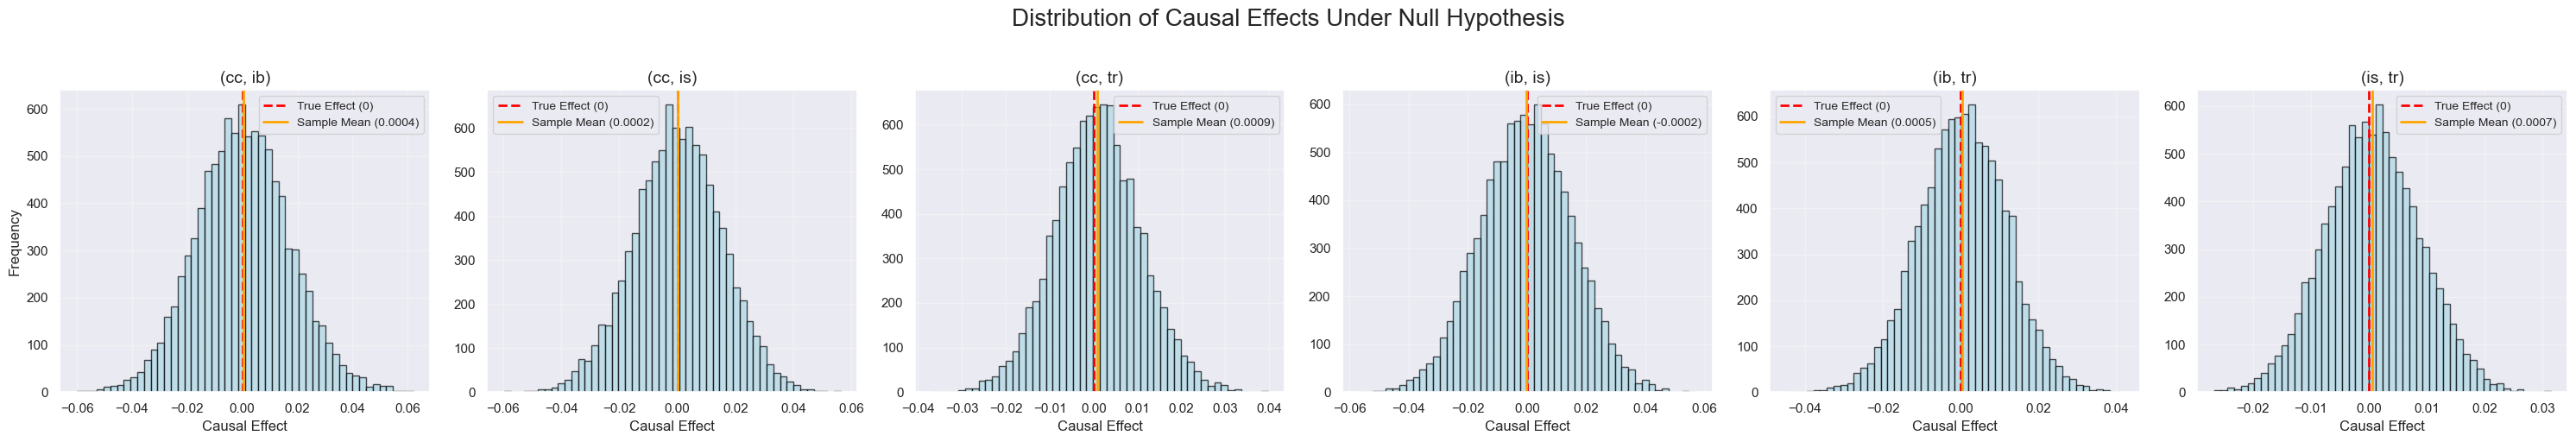

📈 Plot 2: P-Value Distributions Under Null...


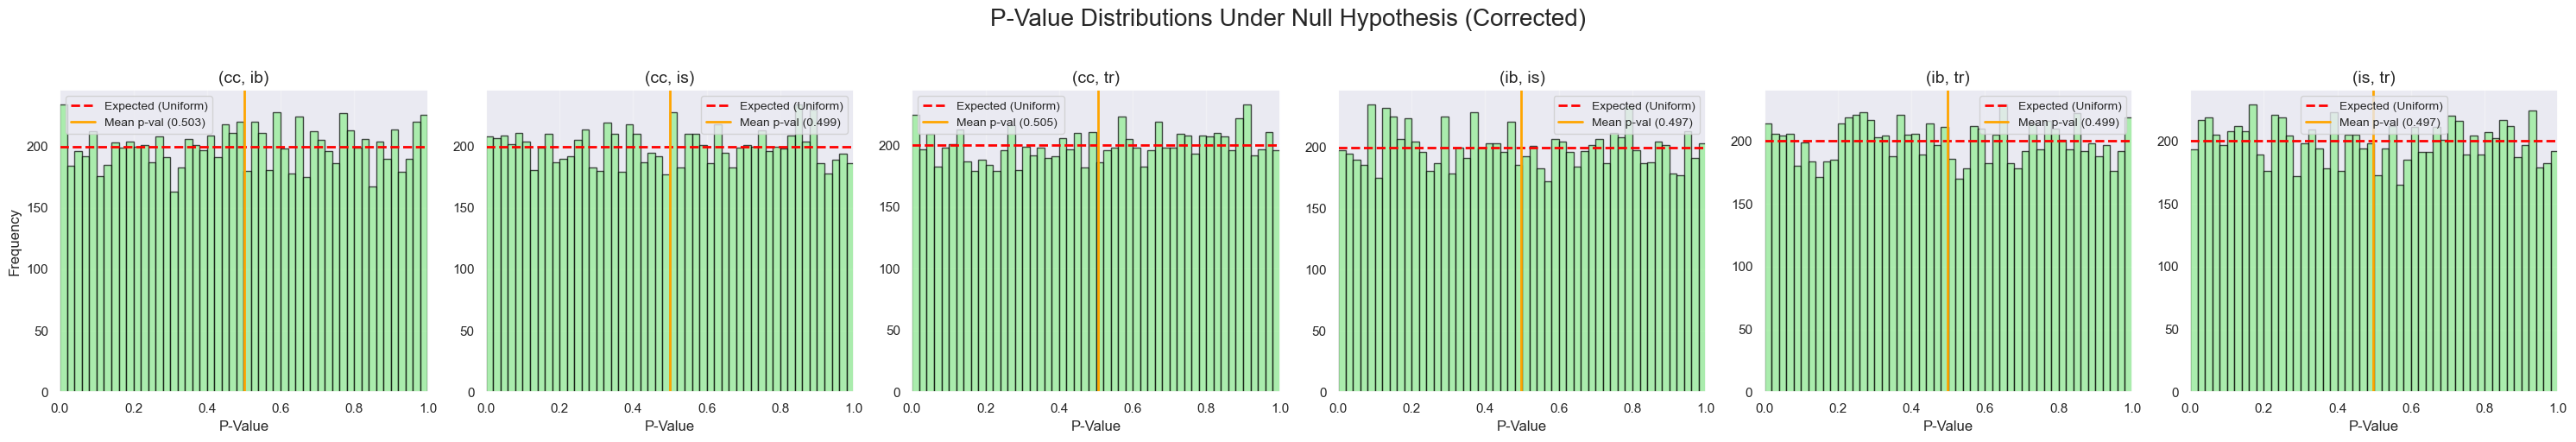

In [7]:
print("\n📊 GENERATING NULL HYPOTHESIS PLOTS")
print("=" * 60)

# Plot 1: Distribution of Causal Effects
print("📈 Plot 1: Distribution of Causal Effects Under Null...")
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
fig.suptitle('Distribution of Causal Effects Under Null Hypothesis', fontsize=20, y=1.02)

for idx, (combo_label, effects) in enumerate(causal_effects.items()):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(effects, bins=50, alpha=0.7, color='lightblue', edgecolor='black')
    
    # Add vertical line at zero (true effect under null)
    ax.axvline(0, color='red', linestyle='--', linewidth=2, label='True Effect (0)')
    
    # Add vertical line at sample mean
    ax.axvline(np.mean(effects), color='orange', linestyle='-', linewidth=2, 
               label=f'Sample Mean ({np.mean(effects):.4f})')
    
    # Formatting
    ax.set_title(combo_label, fontsize=14)
    ax.set_xlabel('Causal Effect', fontsize=12)
    if idx == 0:
        ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/null_hypothesis_causal_effects.pdf', dpi=100, bbox_inches='tight')
plt.show()

# Plot 2: P-value Distributions  
print("📈 Plot 2: P-Value Distributions Under Null...")
fig, axes = plt.subplots(1, 6, figsize=(30, 5))
fig.suptitle('P-Value Distributions Under Null Hypothesis (Corrected)', fontsize=20, y=1.02)

for idx, (combo_label, pvals) in enumerate(p_values.items()):
    ax = axes[idx]
    
    # Plot histogram
    ax.hist(pvals, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    
    # Add horizontal line for uniform distribution reference
    ax.axhline(len(pvals)/50, color='red', linestyle='--', linewidth=2, 
               label='Expected (Uniform)')
    
    # Add vertical line at mean p-value
    ax.axvline(np.mean(pvals), color='orange', linestyle='-', linewidth=2,
               label=f'Mean p-val ({np.mean(pvals):.3f})')
    
    # Formatting
    ax.set_title(combo_label, fontsize=14)
    ax.set_xlabel('P-Value', fontsize=12)
    ax.set_xlim([0, 1])
    if idx == 0:
        ax.set_ylabel('Frequency', fontsize=12)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('plots/null_hypothesis_pvalue_distributions.pdf', dpi=100, bbox_inches='tight')
plt.show()
